In [1]:
import os
from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 파이썬 문자열 관련 함수 사용
- os
- glob
- replace
- split
- join
- strip

In [12]:
train_paths = glob('C:/Users/신상훈/Desktop/새 폴더/dataset/cifar/train/*.png')
test_paths = glob('C:/Users/신상훈/Desktop/새 폴더/dataset/cifar/test/*.png')

In [13]:
len(train_paths) , len(test_paths)

(50000, 10000)

In [15]:
path = train_paths[0]
path

'C:/Users/신상훈/Desktop/새 폴더/dataset/cifar/train\\0_frog.png'

In [16]:
path.replace('cifar','')

'C:/Users/신상훈/Desktop/새 폴더/dataset//train\\0_frog.png'

In [18]:
path.split('_')

['C:/Users/신상훈/Desktop/새 폴더/dataset/cifar/train\\0', 'frog.png']

In [20]:
','.join(['a','b','c'])

'a,b,c'

In [22]:
'   adv    '.strip()

'adv'

In [23]:
os.path.basename(path)

'0_frog.png'

In [24]:
os.path.dirname(path)

'C:/Users/신상훈/Desktop/새 폴더/dataset/cifar/train'

In [26]:
os.path.exists(path)

True

In [30]:
fname = os.path.basename(path)
clsname = fname.replace('.png','').split('_')[-1]
clsname

'frog'

### class 이름 얻은 것을 함수로 묶기

In [37]:
def get_class_name(path):
    fname = os.path.basename(path)
    return fname.replace('.png','').split('_')[-1]

In [38]:
path, get_class_name(path)

('C:/Users/신상훈/Desktop/새 폴더/dataset/cifar/train\\0_frog.png', 'frog')

# Class 수 확인

In [40]:
class_names = []

for path in train_paths:
    cls_name = get_class_name(path)
    class_names.append(cls_name)

In [42]:
classes_name = [get_class_name(path) for path in train_paths]

In [43]:
len(class_names) , len(classes_name)

(50000, 50000)

In [46]:
uniques = np.unique(class_names, return_counts = True)

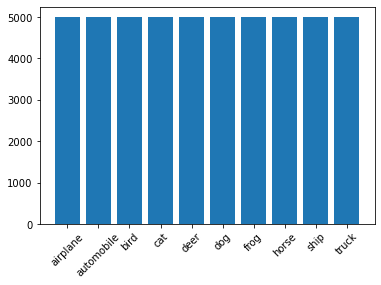

In [50]:
plt.bar(uniques[0],uniques[1])
plt.xticks(rotation=45)
plt.show()

# DataFrame 생성

### DataFrame 생성 방법

In [51]:
data_ex = {'a':[1, 2, 3], 'b':[10, 20, 30], 'c':[100, 200, 300]}

df_ex = pd.DataFrame(data_ex)
df_ex

,a,b,c
0,1,10,100
1,2,20,200
2,3,30,300


In [59]:
data = {'path': train_paths, 'class_name': classes_name}

In [53]:
df = pd.DataFrame(data)
df.head()

,path,class_name
0,C:/Users/신상훈/Desktop/새 폴더/dataset/cifar/train\...,frog
1,C:/Users/신상훈/Desktop/새 폴더/dataset/cifar/train\...,automobile
2,C:/Users/신상훈/Desktop/새 폴더/dataset/cifar/train\...,frog
3,C:/Users/신상훈/Desktop/새 폴더/dataset/cifar/train\...,frog
4,C:/Users/신상훈/Desktop/새 폴더/dataset/cifar/train\...,ship


In [57]:
test_name = [get_class_name(path) for path in test_paths]

In [60]:
test_data = {'path': test_paths, 'class_name': test_name}

In [62]:
test_df = pd.DataFrame(test_data)
test_df.head()

,path,class_name
0,C:/Users/신상훈/Desktop/새 폴더/dataset/cifar/test\0...,cat
1,C:/Users/신상훈/Desktop/새 폴더/dataset/cifar/test\1...,dog
2,C:/Users/신상훈/Desktop/새 폴더/dataset/cifar/test\1...,airplane
3,C:/Users/신상훈/Desktop/새 폴더/dataset/cifar/test\1...,ship
4,C:/Users/신상훈/Desktop/새 폴더/dataset/cifar/test\1...,deer


## 만들어진 DataFrame 저장

In [54]:
train_csv_path = 'train_dataset.csv'

In [55]:
df.to_csv(train_csv_path, index=False)  

In [63]:
test_csv_path = 'test_dataset.csv'

In [64]:
test_df.to_csv(test_csv_path, index = False)

## Data 확인

In [65]:
from PIL import Image
from tqdm import tqdm_notebook

In [69]:
c = []
widths = []

In [70]:
image_pil = Image.open(path)
image = np.array(image_pil)
image.shape

(32, 32, 3)

In [71]:
for path in tqdm_notebook(train_paths):
    img_pil = Image.open(path)
    iamge = np.array(image_pil)
    h, w, c = image.shape
    
    heights.append(h)
    widths.append(w)

<ipython-input-71-6d4d9c9e9b6f>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for path in tqdm_notebook(train_paths):


In [73]:
np.unique(heights), np.unique(widths)

(array([32]), array([32]))